# Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods 
Now that you have been equipped with the skills and the tools to use location data to explore a geographical location, over the course of two weeks, you will have the opportunity to be as creative as you want and come up with an idea to leverage the Foursquare location data to explore or compare neighborhoods or cities of your choice or to come up with a problem that you can use the Foursquare location data to solve.

## 1) Introduction/Business Problem
Clearly define a problem or an idea of your choice, where you would need to leverage the Foursquare location data to solve or execute. Remember that data science problems always target an audience and are meant to help a group of stakeholders solve a problem, so make sure that you explicitly describe your audience and why they would care about your problem.

__The idea of this study is to help people planning their journey in the San Francisco. It will help them to choose the right route where the crime is low.__


## 2) Data
Describe the data that you will be using to solve the problem or execute your idea. Remember that you will need to use the Foursquare location data to solve the problem or execute your idea. You can absolutely use other datasets in combination with the Foursquare location data. So make sure that you provide adequate explanation and discussion, with examples, of the data that you will be using, even if it is only Foursquare location data.

__To help people we will use dataset from site San Francisco police department. It contains data from 2003 to 2018.  
Site: https://datasf.org/__


## 3) Methodology

Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, and what machine learnings were used and why.  
__For this report, I used data on crimes in San Francisco, depicted the dependence of crimes from month and year or hour. In the end, I built several models to predict new crimes.__

## 4) Results
Results section where you discuss the results.

__Comparing the data, we can see that crimes often occur on Thursday, lunchtime and late afternoon.__

## 5) Discussion

Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.

__It was interesting to see the history of crimes in a large city like Chicago, to find out when if crimes happen, and so on.__

## 6) Conclusion
Conclusion section where you conclude the report.

__I hope my this research will help people planning their journey in the San Francisco. If I visit San Francisco, firstly, I will use this my research.__

## Import Libraries

In this section we import the libraries that will be required to process the data.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

In [2]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
# Use Folium to display the Maps for Visualisation
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium import plugins


In [4]:
# Module to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim

In [5]:
# All the SciKit Learn Libraries Required
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score


## Import the DataSet

In [6]:
#data were taken from https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry/data
df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215024 entries, 0 to 2215023
Data columns (total 33 columns):
IncidntNum                                              int64
Category                                                object
Descript                                                object
DayOfWeek                                               object
Date                                                    object
Time                                                    object
PdDistrict                                              object
Resolution                                              object
Address                                                 object
X                                                       float64
Y                                                       float64
Location                                                object
PdId                                                    int64
SF Find Neighborhoods                                   float64
Curr

In [8]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,DELETE - Fire Prevention Districts,DELETE - Police Districts,DELETE - Supervisor Districts,DELETE - Zip Codes,DELETE - Neighborhoods,DELETE - 2017 Fix It Zones,Civic Center Harm Reduction Project Boundary,Fix It Zones as of 2017-11-06,DELETE - HSOC Zones,Fix It Zones as of 2018-02-07,"CBD, BID and GBD Boundaries as of 2017","Areas of Vulnerability, 2016",Central Market/Tenderloin Boundary,Central Market/Tenderloin Boundary Polygon - Updated,HSOC Zones as of 2018-06-05,OWED Public Spaces
0,146196161,NON-CRIMINAL,LOST PROPERTY,Tuesday,09/23/2014,01:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,POINT (-122.403404791479 37.775420706711),14619616171000,32.0,1.0,10.0,34.0,14.0,2.0,9.0,"28,853",34.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
1,150045675,ASSAULT,BATTERY,Thursday,01/15/2015,17:00,TARAVAL,NONE,1800 Block of VICENTE ST,-122.485604,37.738821,POINT (-122.48560378101 37.7388214326705),15004567504134,40.0,10.0,7.0,35.0,1.0,8.0,3.0,"29,491",35.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,140632022,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Wednesday,07/30/2014,09:32,BAYVIEW,NONE,100 Block of GILLETTE AV,-122.396535,37.710660,POINT (-122.396535107224 37.7106603302503),14063202264085,89.0,2.0,9.0,1.0,10.0,3.0,8.0,309,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,150383259,ASSAULT,BATTERY,Saturday,05/02/2015,23:10,BAYVIEW,"ARREST, BOOKED",2400 Block of PHELPS ST,-122.400131,37.730093,POINT (-122.400130573297 37.7300925390327),15038325904134,87.0,2.0,9.0,1.0,10.0,3.0,8.0,58,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
4,40753980,OTHER OFFENSES,RECKLESS DRIVING,Friday,07/02/2004,13:43,BAYVIEW,NONE,I-280 / CESAR CHAVEZ ST,-120.500000,90.000000,POINT (-120.5 90),4075398065020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.shape

(2215024, 33)

# Clean up the data and prepare

In [10]:
 df.isnull().sum()

IncidntNum                                                    0
Category                                                      0
Descript                                                      0
DayOfWeek                                                     0
Date                                                          0
Time                                                          0
PdDistrict                                                    1
Resolution                                                    0
Address                                                       0
X                                                             0
Y                                                             0
Location                                                      0
PdId                                                          0
SF Find Neighborhoods                                      6077
Current Police Districts                                   1112
Current Supervisor Districts            

In [11]:
#We take only important columns
df_import=df[['IncidntNum','Category','Descript','DayOfWeek','Date','Time','PdDistrict','Address','X','Y','PdId']]

In [12]:
df_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215024 entries, 0 to 2215023
Data columns (total 11 columns):
IncidntNum    int64
Category      object
Descript      object
DayOfWeek     object
Date          object
Time          object
PdDistrict    object
Address       object
X             float64
Y             float64
PdId          int64
dtypes: float64(2), int64(2), object(7)
memory usage: 185.9+ MB


In [13]:
df_import.head(3)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Address,X,Y,PdId
0,146196161,NON-CRIMINAL,LOST PROPERTY,Tuesday,09/23/2014,01:00,SOUTHERN,800 Block of BRYANT ST,-122.403405,37.775421,14619616171000
1,150045675,ASSAULT,BATTERY,Thursday,01/15/2015,17:00,TARAVAL,1800 Block of VICENTE ST,-122.485604,37.738821,15004567504134
2,140632022,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Wednesday,07/30/2014,09:32,BAYVIEW,100 Block of GILLETTE AV,-122.396535,37.710660,14063202264085


We have to add new column-it will help us to make the models.          
Add new columns for the  day, month and year of the crime:  
1.Day  
2.Month Number  
3.Year  
4.Year and Month  

In [14]:
df_import['Date'] =  pd.to_datetime(df_import['Date'], format='%m/%d/%Y')

C:\Users\slava\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_import['Day'] = df_import['Date'].dt.day
df_import['month'] = df_import['Date'].dt.month
df_import['year'] = df_import['Date'].dt.year
df_import['year_month'] = df_import['Date'].dt.to_period('M')
df_import['hour']=pd.to_datetime(df_import['Time'], format='%H:%M').dt.hour

C:\Users\slava\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\slava\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\slava\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [16]:
df_import.isna().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Address       0
X             0
Y             0
PdId          0
Day           0
month         0
year          0
year_month    0
hour          0
dtype: int64

In [17]:
df_import.dropna(inplace=True)
df_import.reindex()
df_import.head()

C:\Users\slava\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Address,X,Y,PdId,Day,month,year,year_month,hour
0,146196161,NON-CRIMINAL,LOST PROPERTY,Tuesday,2014-09-23,01:00,SOUTHERN,800 Block of BRYANT ST,-122.403405,37.775421,14619616171000,23,9,2014,2014-09,1
1,150045675,ASSAULT,BATTERY,Thursday,2015-01-15,17:00,TARAVAL,1800 Block of VICENTE ST,-122.485604,37.738821,15004567504134,15,1,2015,2015-01,17
2,140632022,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Wednesday,2014-07-30,09:32,BAYVIEW,100 Block of GILLETTE AV,-122.396535,37.710660,14063202264085,30,7,2014,2014-07,9
3,150383259,ASSAULT,BATTERY,Saturday,2015-05-02,23:10,BAYVIEW,2400 Block of PHELPS ST,-122.400131,37.730093,15038325904134,2,5,2015,2015-05,23
4,40753980,OTHER OFFENSES,RECKLESS DRIVING,Friday,2004-07-02,13:43,BAYVIEW,I-280 / CESAR CHAVEZ ST,-120.500000,90.000000,4075398065020,2,7,2004,2004-07,13


In [18]:
df_import.shape

(2215023, 16)

# Data Visualisation

__To get a better understanding of the data we will now visualise it.__

Let's see the first 200000 cases because if we visualize the all data we will not understand it

### Number of Crimes per month

Text(0.0, 1.0, 'Count of Cases Per Month')

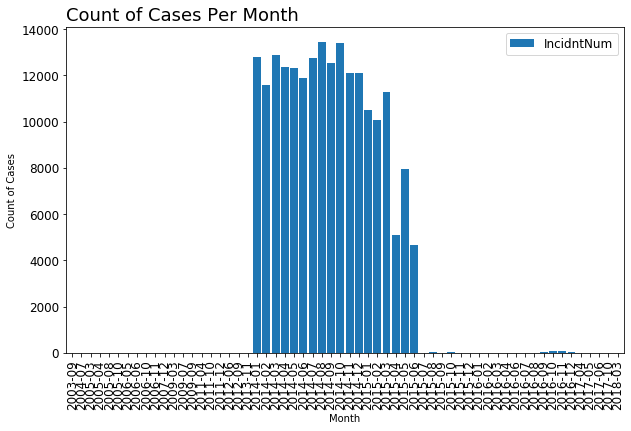

In [19]:
df_import[:200000].groupby('year_month').count().plot(y = 'IncidntNum', 
                                      kind='bar',
                                      figsize=(10,6),
                                      width=0.85,
                                      fontsize=12,
                                      colormap='tab20').legend(bbox_to_anchor=(1,1),
                                                               prop={'size': 12})

plt.xlabel('Month')
plt.ylabel('Count of Cases')
plt.title('Count of Cases Per Month', loc='left', fontsize=18)

### Number of crimes occuring on each day

Text(0.0, 1.0, 'Count of Cases Per Day of Week [1 is a Tuesday]')

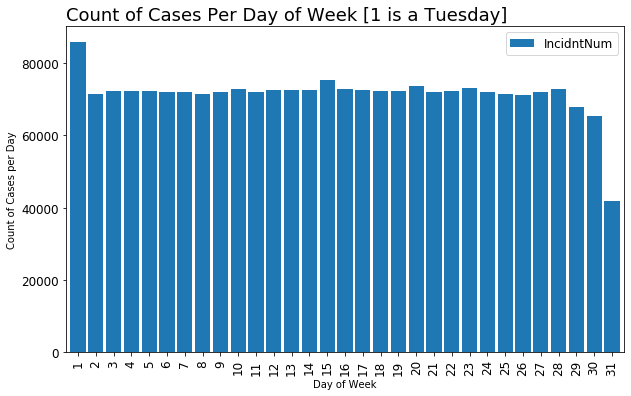

In [20]:
df_import.groupby('Day').count().plot(y = 'IncidntNum',
                               kind='bar',
                               figsize=(10,6),
                               width=0.85,
                               fontsize=12,
                               colormap='tab20').legend(bbox_to_anchor=(1,1),
                                                        prop={'size': 12})

plt.xlabel('Day of Week')
plt.ylabel('Count of Cases per Day')
plt.title('Count of Cases Per Day of Week [1 is a Tuesday]', loc='left', fontsize=18)

### Number of crimes occuring in each hour 

Text(0.0, 1.0, 'Count of Cases Per Hour]')

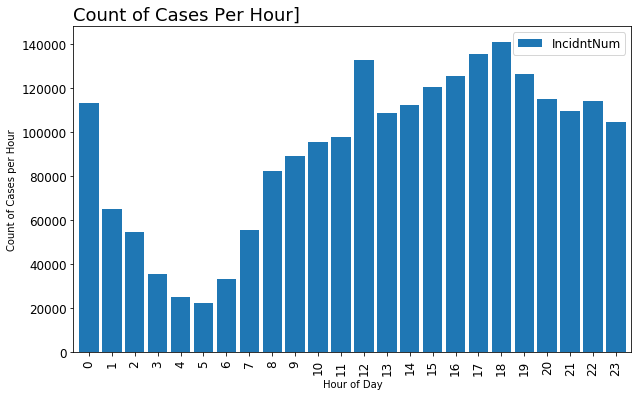

In [21]:
df_import.groupby('hour').count().plot(y = 'IncidntNum',
                               kind='bar',
                               figsize=(10,6),
                               width=0.85,
                               fontsize=12,
                               colormap='tab20').legend(bbox_to_anchor=(1,1),
                                                        prop={'size': 12})

plt.xlabel('Hour of Day')
plt.ylabel('Count of Cases per Hour')
plt.title('Count of Cases Per Hour]', loc='left', fontsize=18)

In [22]:

# Number of unique Crime categories bases on the Primary Description
df_import.Descript.nunique()

915

In [23]:
df_import.Category.nunique()

39

In [24]:
df_import[['Category', 'IncidntNum']].groupby(
    ['Category'], as_index=False).count().sort_values(
    'IncidntNum', ascending=False).head(5)

,Category,IncidntNum
16,LARCENY/THEFT,480447
21,OTHER OFFENSES,309358
20,NON-CRIMINAL,238323
1,ASSAULT,194694
36,VEHICLE THEFT,126602


In [25]:
df_import[['Descript', 'IncidntNum']].groupby(
    ['Descript'], as_index=False).count().sort_values(
    'IncidntNum', ascending=False).head(5)

,Descript,IncidntNum
421,GRAND THEFT FROM LOCKED AUTO,178835
497,LOST PROPERTY,77956
138,BATTERY,67654
768,STOLEN AUTOMOBILE,64763
290,"DRIVERS LICENSE, SUSPENDED OR REVOKED",62534


In [26]:
top_crimes = df_import[['Category', 'IncidntNum']].groupby(
    ['Category']).count().sort_values('IncidntNum', ascending=False)[:10].axes[0].tolist()


top_three_crimes =df_import[['Category', 'IncidntNum']].groupby(
    ['Category']).count().sort_values('IncidntNum', ascending=False)[:3].axes[0].tolist()


top_two_crimes = df_import[['Category', 'IncidntNum']].groupby(
    ['Category']).count().sort_values('IncidntNum', ascending=False)[:2].axes[0].tolist()

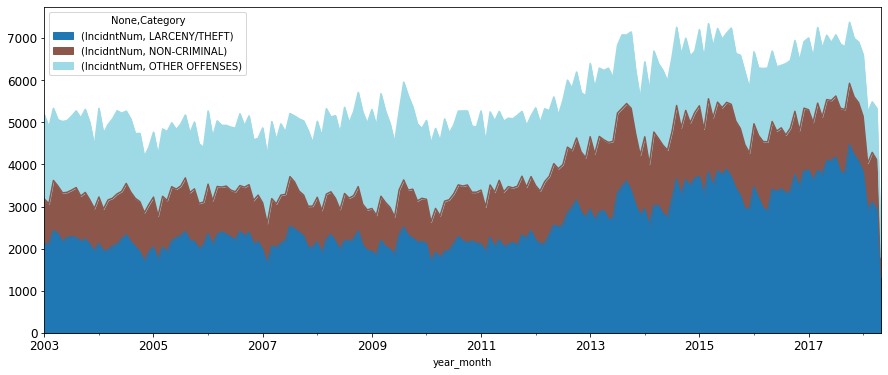

In [27]:
# Create a new data frame with just the top 10 crimes
df_top_crimes = df_import[df_import['Category'].isin(top_crimes)].copy()

# Create a new data frame with just the top 10 crimes
df_top3_crimes = df_import[df_import['Category'].isin(top_three_crimes)].copy()

df_top3_crimes[['IncidntNum', 'Category', 'year_month']].pivot_table(
    index='year_month', 
    columns='Category', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                               fontsize=12,
                               colormap='tab20')

Text(0.0, 1.0, 'Count of Cases Per Hour]')

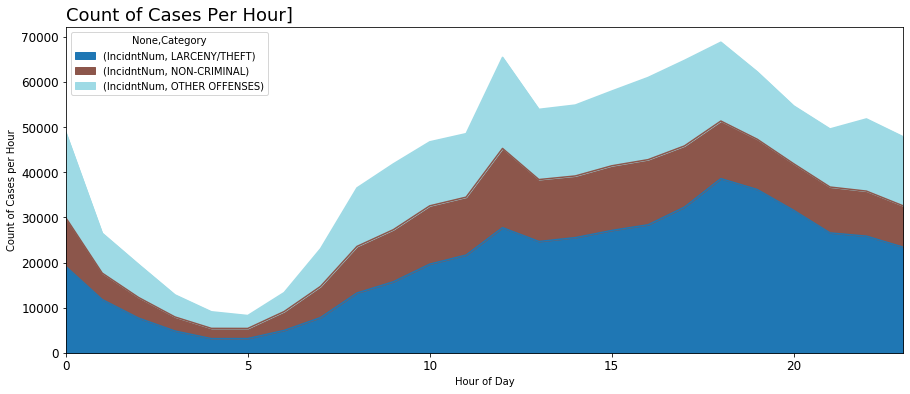

In [28]:
df_top3_crimes[['IncidntNum', 'Category', 'hour']].pivot_table(
    index='hour', 
    columns='Category', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                               fontsize=12,
                               colormap='tab20')

plt.xlabel('Hour of Day')
plt.ylabel('Count of Cases per Hour')
plt.title('Count of Cases Per Hour]', loc='left', fontsize=18)

# Data Preparation for Modelling

Before we start modelling we need to prepare the data frame to include only mumerical data and by removing unneeded columns.

In [29]:
# Start by copying the Latitude and Longitude to the new DataFrame
df_features = df_top_crimes[['Y', 'X']]

# Next and One Hot Encoding of the hour and day 
df_features = df_features.join(pd.get_dummies(df_top_crimes.hour, prefix='hour'))
df_features = df_features.join(pd.get_dummies(df_top_crimes.DayOfWeek))



df_features['crimes'] = df_top_crimes[['Category']]

In [32]:
df_features.head()

,Y,X,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,crimes
0,37.775421,-122.403405,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NON-CRIMINAL
1,37.738821,-122.485604,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,ASSAULT
2,37.710660,-122.396535,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,SUSPICIOUS OCC
3,37.730093,-122.400131,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,ASSAULT
4,90.000000,-120.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,OTHER OFFENSES


In [36]:
df_features_3 = df_features[df_features['crimes'].isin(top_three_crimes)].copy()

# Create a smaller DataFrame of only the top two crimes
df_features_2 = df_features[df_features['crimes'].isin(top_two_crimes)].copy()

In [37]:
X_10 = df_features.copy()
y_10 = X_10.crimes.values

X_10.drop('crimes', axis=1, inplace=True)
X_10 = preprocessing.StandardScaler().fit(X_10).transform(X_10)


X_3 = df_features_3.copy()
y_3 = X_3.crimes.values

X_3.drop('crimes', axis=1, inplace=True)
X_3 = preprocessing.StandardScaler().fit(X_3).transform(X_3)

X_2 = df_features_2.copy()
y_2 = X_2.crimes.values

X_2.drop('crimes', axis=1, inplace=True)
X_2 = preprocessing.StandardScaler().fit(X_2).transform(X_2)

In [40]:
def cross_validate(model, n_splits = 10):
    
    k_fold = KFold(n_splits = n_splits)
    scores = [model.fit(X[train], y[train]).score(X[test], y[test]) for train, test in k_fold.split(X)]
    
    scores = np.percentile(scores, [40, 50, 60])
    return scores

# K Nearest Neighbor(KNN)

Heighbours:  5  
Heighbours:  6  
Heighbours:  7  
Heighbours:  8  
Heighbours:  9  
Heighbours:  10  
Heighbours:  11  


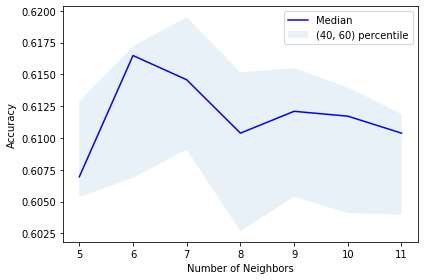

In [41]:
# Number of neighbours
neighs = range(5, 12)

# Store the scores
scores = np.zeros((len(neighs), 3))

for idx, neigh in enumerate(neighs):
    print('Heighbours: ', neigh, ' ')
    model = KNeighborsClassifier(n_neighbors = neigh)
    scores[idx, : ] = cross_validate(model, n_splits = 5)

plt.plot(neighs, scores[ : , 1], 'b')
plt.fill_between(neighs, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.tight_layout()
plt.show()

# Random Forest

Estimator:  12  
Estimator:  13  
Estimator:  14  
Estimator:  15  


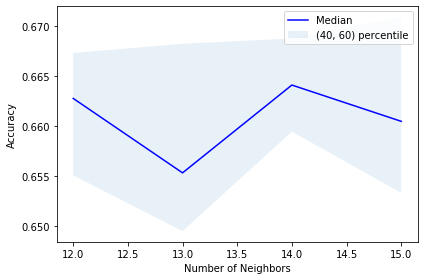

In [42]:
est = range(12, 16)
scores = np.zeros((len(est), 3))
for idx, a in enumerate(est):
    print('Estimator: ', a, ' ')
    model = RandomForestClassifier(n_estimators = a, max_features = 'sqrt')
    scores[idx, : ] = cross_validate(model, n_splits = 10)

plt.plot(est, scores[ : , 1], 'b')
plt.fill_between(est, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.tight_layout()
plt.show()

# Logistic Regression

C:  0.01  
C:  0.03162277660168379  
C:  0.1  
C:  0.31622776601683794  
C:  1.0  
C:  3.1622776601683795  


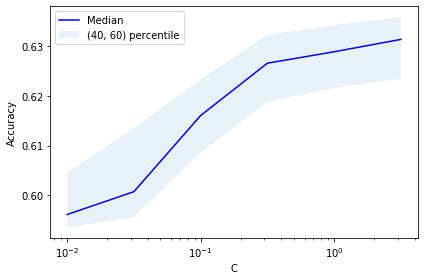

In [43]:
from sklearn.linear_model import LogisticRegression

C = np.logspace(-2.0, 0.5, num = 6, endpoint = True)
scores = np.zeros((len(C), 3))
for idx, c in enumerate(C):
    print('C: ', c, ' ')
    model = LogisticRegression(C = c, solver = 'liblinear')
    scores[idx, : ] = cross_validate(model, n_splits = 10)

plt.plot(C, scores[ : , 1], 'b')
plt.xscale('log')
plt.fill_between(C, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.tight_layout()
plt.show()

# Decision Tree

Depth:  10  
Depth:  11  
Depth:  12  
Depth:  13  
Depth:  14  
Depth:  15  
Depth:  16  
Depth:  17  
Depth:  18  
Depth:  19  
Depth:  20  


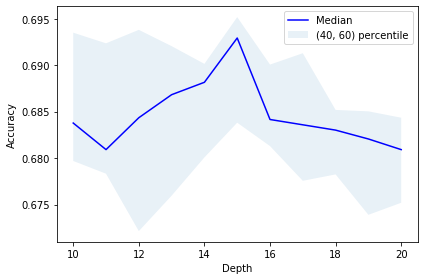

In [45]:
from sklearn.tree import DecisionTreeClassifier

depths = range(10, 21)
scores = np.zeros((len(depths), 3))
for idx, depth in enumerate(depths):
    print('Depth: ', depth, ' ')
    model = DecisionTreeClassifier(criterion = "entropy", max_depth = depth)
    scores[idx, : ] = cross_validate(model, n_splits = 10)

plt.plot(depths, scores[ : , 1], 'b')
plt.fill_between(depths, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.tight_layout()
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
X = X_10
y = y_10
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [58]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
#K Nearest Neighbor(KNN)
model = KNeighborsClassifier(n_neighbors = 6)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test, y_pred)

0.51


In [57]:
#Random Forest
model = RandomForestClassifier(n_estimators = 14, max_features = 'sqrt')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test, y_pred)

0.89


In [52]:
#Logistic Regression
model = LogisticRegression(C = 3.1622776601683795  , solver = 'liblinear')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\slava\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.3389090909090909

In [59]:
#Decision Tree
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 100)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6321
